In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "../data/processed/cleaned_telco_churn.csv"
df = pd.read_csv(file_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
df.shape
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

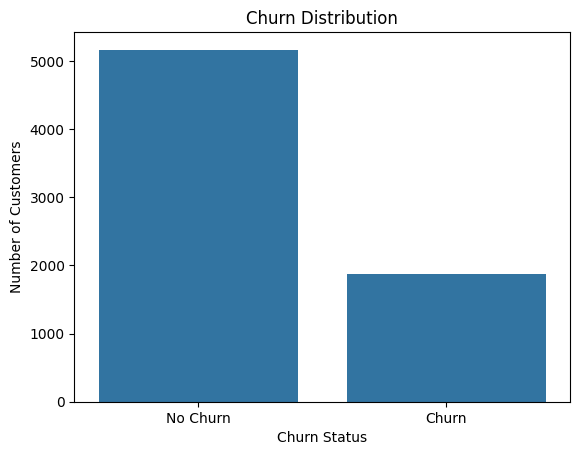

In [5]:
churn_counts = df['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.show()

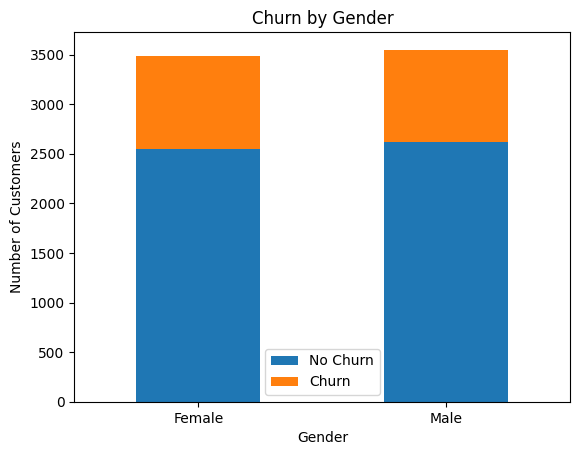

In [6]:
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
churn_by_gender.plot(kind='bar', stacked=True)

plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'])
plt.show()

Summary
- No significant correlation between gender and churn

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

X = df.drop(columns=['Churn'])
y = df['Churn']
X_encoded = X.apply(LabelEncoder().fit_transform)
chi_scores, p_values = chi2(X_encoded, y)
chi2_df = pd.DataFrame({
    'Feature': X_encoded.columns, 
    'Chi2 Score': chi_scores, 
    'p-value': p_values}).sort_values(by='Chi2 Score', ascending=False)

chi2_df.head(10)

In [ ]:
features = ['TotalCharges', 'MonthlyCharges', 'tenure']
axes = df.groupby('Churn')[features].mean().plot(
    kind='bar', subplots=True, layout=(1, 3), figsize=(15, 3), legend=False
)

for ax in axes.flatten():
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Churn Status')
    ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)
plt.show()

contract = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'])
plt.show()

Summary:

- Total Charges: Customers that have lower total charges tend to churn more. This suggests that they leave early in their contracts before accumulating large costs.

- Monthly Charges: Customers with higher monthly charges are prone to churning. This implies that higher monthly costs may be driving away some customers.

- Tenure: Customers who churned had lower tenure. Meaning that they tend to leave early.

- Contract Type: The shorter the contract type, the more customers tend to churn. Most churning happens in Month-to-Month, least in in two-year contracts.